# CHROMBPNET USAGE

This notebook demonstrates the usage of ChromBPNet through Chorus API

## Installation Instructions (Reference)

If you haven't installed Chorus yet, follow these steps:

```bash
# 1. Clone the repository
git clone https://github.com/pinellolab/chorus.git
cd chorus

# 2. Create the main Chorus environment
mamba env create -f environment.yml
mamba activate chorus

# 3. Install Chorus package
pip install -e .

# 4. Set up the Enformer environment
chorus setup --oracle chrombpnet

# 5. Download the reference genome
chorus genome download hg38
```

**Note**: 
- For this notebook, we assume Chorus is already installed.
- pyGenomeTracks is now included in the environment for advanced visualization!

In [2]:
import pandas as pd

METADATA = "../chorus/oracles/chrombpnet_source/ultimate_metadata_table_DL.tsv"

chrombpnet_metadata = pd.read_csv(METADATA, sep="\t")
chrombpnet_metadata

,BASE_ID,VERSION,TF_NAME,CELL_LINE,TAX_ID,DATA_TYPE,MODEL_NAME,SOURCE,SOURCE_ID,SOURCE_URL,MODEL_URL,MODISCO_COUNTS_URL,MODISCO_PROFILE_URL
0,BP000001,1,REST,K562,9606,ChIP-seq,BPNet,ENCODE,ENCSR000ATM,https://www.encodeproject.org/experiments/ENCS...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...
1,BP000002,1,REST,GM12878,9606,ChIP-seq,BPNet,ENCODE,ENCSR000BGF,https://www.encodeproject.org/experiments/ENCS...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...
2,BP000003,1,ZBTB33,GM12878,9606,ChIP-seq,BPNet,ENCODE,ENCSR000BHC,https://www.encodeproject.org/experiments/ENCS...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...
3,BP000004,1,REST,H1,9606,ChIP-seq,BPNet,ENCODE,ENCSR000BHM,https://www.encodeproject.org/experiments/ENCS...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...
4,BP000005,1,ZBTB33,HepG2,9606,ChIP-seq,BPNet,ENCODE,ENCSR000BHR,https://www.encodeproject.org/experiments/ENCS...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,BP001255,1,CTCF,A549,9606,ChIP-seq,BPNet,ENCODE,ENCSR000DNA,https://www.encodeproject.org/experiments/ENCS...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...
1255,BP001256,1,JUND,SK-N-SH,9606,ChIP-seq,BPNet,ENCODE,ENCSR000EIB,https://www.encodeproject.org/experiments/ENCS...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...
1256,BP001257,1,ONECUT2,HepG2,9606,ChIP-seq,BPNet,ENCODE,ENCSR661PKJ,https://www.encodeproject.org/experiments/ENCS...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...
1257,BP001258,1,CTCF,tibial nerve,9606,ChIP-seq,BPNet,ENCODE,ENCSR469POZ,https://www.encodeproject.org/experiments/ENCS...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...,https://mencius.uio.no/JASPAR/JASPAR_DeepLearn...


In [10]:
TF = "CTCF"
CELL_TYPE = "K562"

urls = chrombpnet_metadata[(chrombpnet_metadata["TF_NAME"] == TF) & (chrombpnet_metadata["CELL_LINE"] == CELL_TYPE)]["MODEL_URL"]
url = urls.tolist()[0]

In [17]:
import subprocess

subprocess.run(
    ["wget", "-P", ".", "https://mencius.uio.no/JASPAR/JASPAR_DeepLearning/2026/models/BP000001.1/"],
    text=True,
    capture_output=True
)

CompletedProcess(args=['wget', '-P', '.', 'https://mencius.uio.no/JASPAR/JASPAR_DeepLearning/2026/models/BP000001.1/'], returncode=0, stdout='', stderr='--2025-12-09 21:26:35--  https://mencius.uio.no/JASPAR/JASPAR_DeepLearning/2026/models/BP000001.1/\nResolving mencius.uio.no (mencius.uio.no)... 129.240.196.19\nConnecting to mencius.uio.no (mencius.uio.no)|129.240.196.19|:443... connected.\nHTTP request sent, awaiting response... 200 OK\nLength: 1733 (1.7K) [text/html]\nSaving to: ‘./index.html’\n\n     0K .                                                     100% 1.31G=0s\n\n2025-12-09 21:26:35 (1.31 GB/s) - ‘./index.html’ saved [1733/1733]\n\n')

In [23]:
import tensorflow as tf
from tensorflow.keras.utils import get_custom_objects
import tensorflow_probability as tfp

def multinomial_nll(true_counts, logits):
    counts_per_example = tf.reduce_sum(true_counts, axis=-1)
    dist = tfp.distributions.Multinomial(total_count=counts_per_example,logits=logits)

    return (-tf.reduce_sum(dist.log_prob(true_counts)) /
            tf.cast(tf.shape(true_counts)[0], dtype=tf.float32))

tf.keras.models.load_model(
    'BP000675.1_model.h5',
    compile=False,
    custom_objects={"multinomial_nll": multinomial_nll}
)

/storage_1/lruggeri/miniforge3/envs/chorus-chrombpnet/lib/python3.10/site-packages/keras/layers/core/lambda_layer.py:303: UserWarning: bpnet.model.arch is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(config, custom_objects,


ValueError: bad marshal data (unknown type code)

In [ ]:
import h5py

with h5py.File("BP000675.1_model.h5", "r") as f:
    print("Keys:", list(f.keys()))
    for k in f.keys():
        print(k, "→", list(f[k].keys()))


Keys: ['neg_patterns', 'pos_patterns']
neg_patterns → ['ENCSR267TGY_ChIP_ARNT2_HepG2_ENCSR041XVL_profile_pattern_0', 'ENCSR267TGY_ChIP_ARNT2_HepG2_ENCSR041XVL_profile_pattern_1', 'ENCSR267TGY_ChIP_ARNT2_HepG2_ENCSR041XVL_profile_pattern_2', 'ENCSR267TGY_ChIP_ARNT2_HepG2_ENCSR041XVL_profile_pattern_3']
pos_patterns → ['ENCSR267TGY_ChIP_ARNT2_HepG2_ENCSR041XVL_profile_pattern_0', 'ENCSR267TGY_ChIP_ARNT2_HepG2_ENCSR041XVL_profile_pattern_1', 'ENCSR267TGY_ChIP_ARNT2_HepG2_ENCSR041XVL_profile_pattern_10', 'ENCSR267TGY_ChIP_ARNT2_HepG2_ENCSR041XVL_profile_pattern_11', 'ENCSR267TGY_ChIP_ARNT2_HepG2_ENCSR041XVL_profile_pattern_12', 'ENCSR267TGY_ChIP_ARNT2_HepG2_ENCSR041XVL_profile_pattern_13', 'ENCSR267TGY_ChIP_ARNT2_HepG2_ENCSR041XVL_profile_pattern_14', 'ENCSR267TGY_ChIP_ARNT2_HepG2_ENCSR041XVL_profile_pattern_15', 'ENCSR267TGY_ChIP_ARNT2_HepG2_ENCSR041XVL_profile_pattern_16', 'ENCSR267TGY_ChIP_ARNT2_HepG2_ENCSR041XVL_profile_pattern_17', 'ENCSR267TGY_ChIP_ARNT2_HepG2_ENCSR041XVL_profile_pat

# 1. Oracle Initialization

In [1]:
import chorus
from chorus.utils import get_genome, extract_sequence, download_gencode

# Get reference genome (auto-downloads if not present)
print("Setting up reference genome...")
genome_path = get_genome('hg38')
print(f"Using genome: {genome_path}")

# Download gene annotations
print("\nSetting up gene annotations...")
gtf_path = download_gencode(version='v48', annotation_type='basic')
print(f"Using annotations: {gtf_path}")

# Initialize the model
oracle = chorus.create_oracle(
    'chrombpnet',
    use_environment=True,
    reference_fasta=str(genome_path)
)

2025-11-27 16:14:48,801 - chorus.utils.annotations - INFO - Annotation file already exists: /home/penzard/pinellolab/fork/chorus/annotations/gencode.v48.basic.annotation.gtf
2025-11-27 16:14:48,802 - chorus.core.base - INFO - Device: auto-detect (GPU if available, else CPU)
2025-11-27 16:14:48,817 - chorus.core.environment.manager - INFO - Found conda via CONDA_EXE: /home/penzard/conda/bin/conda
2025-11-27 16:14:48,817 - chorus.core.environment.manager - INFO - Found mamba at: /home/penzard/conda/bin/mamba


Setting up reference genome...
Using genome: /home/penzard/pinellolab/fork/chorus/genomes/hg38.fa

Setting up gene annotations...
Using annotations: /home/penzard/pinellolab/fork/chorus/annotations/gencode.v48.basic.annotation.gtf


2025-11-27 16:14:52,059 - chorus.core.base - INFO - Using conda environment: chorus-chrombpnet


In [2]:
from chorus.core.globals import CHORUS_DOWNLOADS_DIR

In [3]:
oracle.use_environment

True

# 2. Model Loading

ChromBPNet pretrained models are hosted on Zenodo, for this notebook we'll load the model trained on K562 ATAC-seq tracks. The function load_pretrained_model downloads the available weigts and return the selected one.

In [4]:
oracle.get_model_weights_path(assay="DNASE",
    cell_type="HepG2", fold=0)

PosixPath('/home/penzard/pinellolab/fork/chorus/downloads/chrombpnet/DNASE_HepG2/models/fold_0/chrombpnet/chrombpnet')

In [5]:
oracle.load_pretrained_model(
    assay="DNASE",
    cell_type="HepG2",
    weights='/home/penzard/pinellolab/fork/chorus/downloads/chrombpnet/DNASE_HepG2/models/fold_0/chrombpnet/chrombpnet/'
)

2025-11-27 16:14:52,091 - chorus.oracles.chrombpnet - INFO - Loading ChromBPNet model...


Loading in environment


2025-11-27 16:14:59,879 - chorus.oracles.chrombpnet - INFO - ChromBPNet model loaded successfully in environment!


# 3. Making Predictions

In [6]:
predictions = oracle.predict(
    ("chrX", 48777634, 48790694),
)

In [7]:
# Define GATA1 TSS region
gata1_region = "chrX:48777634-48790694"
print(f"Analyzing wild-type region: {gata1_region}")
print("This region contains the GATA1 transcription start site\n")

# Extract sequence information
wt_seq = extract_sequence(gata1_region, str(genome_path))
print(f"Region length: {len(wt_seq):,} bp")
print(f"GC content: {(wt_seq.count('G') + wt_seq.count('C')) / len(wt_seq) * 100:.1f}%")

Analyzing wild-type region: chrX:48777634-48790694
This region contains the GATA1 transcription start site

Region length: 13,061 bp
GC content: 47.2%


In [9]:
# Make predictions for wild-type sequence
print("Making predictions using specific track identifiers...")

wt_results = oracle.predict(
    ('chrX', 48_730_000, 48_840_000),
)

Making predictions using specific track identifiers...


In [10]:
import numpy as np
for track_id, prediction in wt_results.items():
    print(f"\n{track_id}:")
    print(f"  Shape: {prediction.values.shape}")
    print(f"  Mean signal: {np.mean(prediction.values):.4f}")
    print(f"  Max signal: {np.max(prediction.values):.4f}")
    print(f"  Signal at TSS region (bins 40-50): {np.mean(prediction.values[40:50]):.4f}")


DNASE:HepG2:
  Shape: (110000,)
  Mean signal: 0.2756
  Max signal: 66.8286
  Signal at TSS region (bins 40-50): 0.0000


In [11]:
import coolbox
from coolbox.api import *

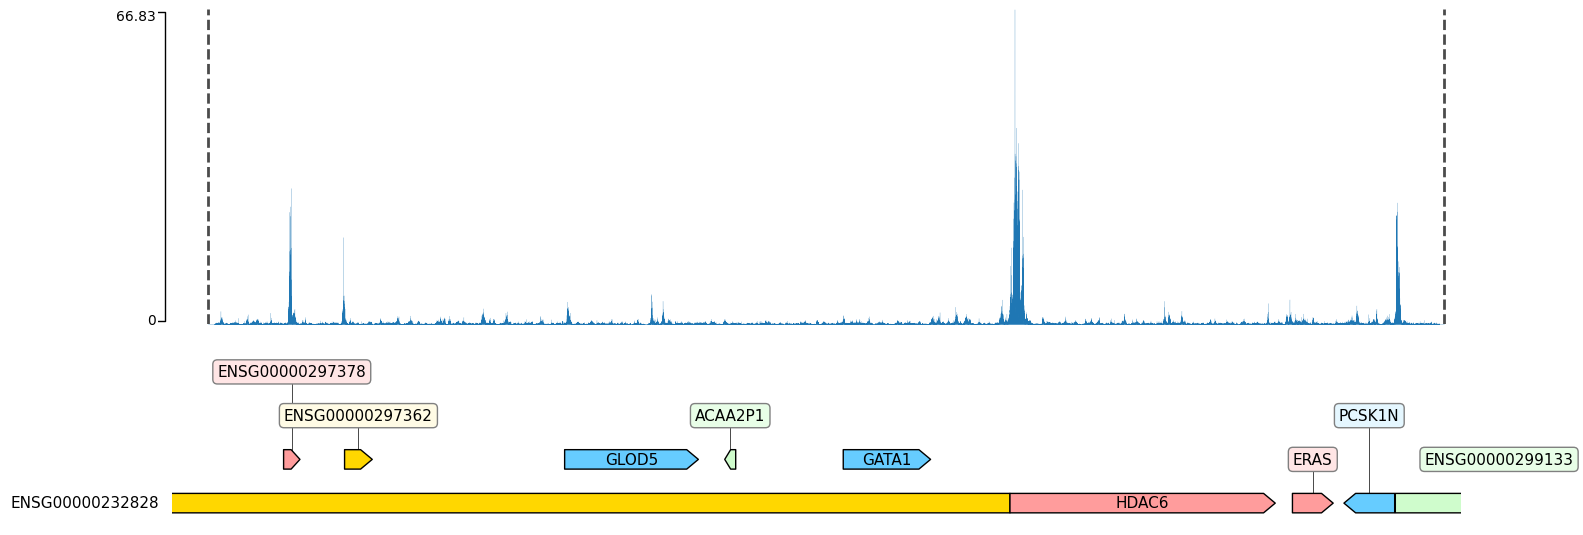

In [12]:
preds = list(wt_results.values())

frame = preds[0].get_coolbox_representation(add_xaxis=False)   +\
        Spacer(0.1) + \
        GTF(str(gtf_path)) + TrackHeight(5)
    
frame.plot('chrX:48726820-48841508') 